In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
import h5py
import numpy as np
from collections import Counter

In [17]:
file = h5py.File(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\data\level_1p0_data\occultation\20180503_004934_1p0_UVIS_U.h5','r')

T = np.array(file['Science/Transmission'])
TangAlt = np.array(file['Geometry/Point0/TangentAltSurface'])
wav = np.array(file['Science/Wavelength'])


avg_TangAlt = np.array([])

for j in range(TangAlt.shape[0]):
    avg_TangAlt = np.append(avg_TangAlt,np.mean(TangAlt[j,:]))

T_250 = T[:,np.array(np.where(wav == min(abs(wav-250))+250)).flatten()].flatten()

In [18]:
df = pd.DataFrame({'Transmission' : T_250, 'Altitude' : avg_TangAlt})
df.head()

,Transmission,Altitude
0,1.004901,253.258959
1,1.002096,251.379710
2,1.001243,249.557804
3,1.008237,247.759906
4,1.001764,245.962882


In [19]:
data = df.iloc[:,0:2]

In [42]:
model = DBSCAN(eps = 0.001, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.001, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [43]:
outliers_df = pd.DataFrame(data)
print(model.labels_)
print(outliers_df[model.labels_ == -1])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
     Transmission    Altitude
0        1.004901  253.258959
1        1.002096  251.379710
2        1.001243  249.557804
3        1.008237  247.759906
4        1.001764  245.962882
5        1.002876  244.148479
6        1.001752  242.319425
7        1.002866  240.479193
8        1.002428  238.648270
9        1.001469  236.790094
10       1.004783  234.899351
11       1.005669  232.990152
12       1.000382  231.062320
13       1.001020  229.228180
14       1.001287  227.373588
15       1.001427  225.518289
16       0.997723  223.609856
17       0.999288  221.690055
18       0.999878  219.761585
19       0.995342  217.828321
20       0.995117  215.87961

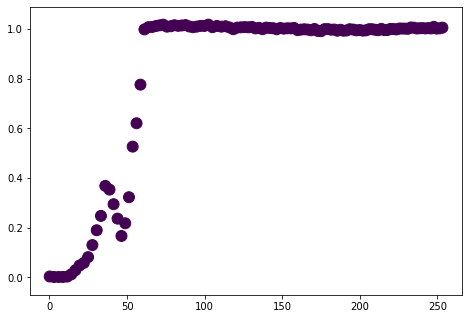

In [44]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(df.iloc[:,1],df.iloc[:,0], c = colors, s = 120)